# Opening and Diplaying Images

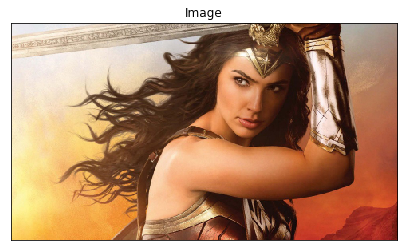

In [2]:
# Displaying with matplotlib
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = './images/gal.jpg'
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(16,4))
ax.imshow(imgo)
ax.set_title('Image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Gaussian Noise Removal as a Demo

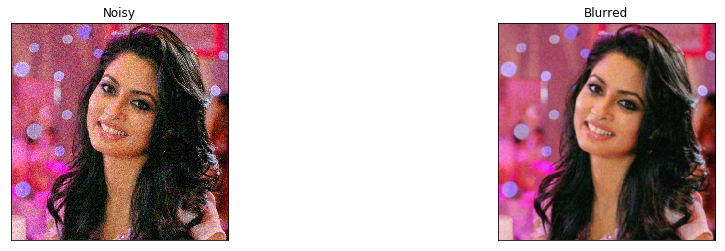

In [20]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = './images/puja.jpg'
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
mu = 0.
sigma = 20.
noise = np.array(imgo.shape).astype('uint8')
noise = np.random.normal(mu,sigma,imgo.shape)
noise = noise.reshape(imgo.shape)
imgn = cv.add(imgo, noise, dtype=cv.CV_8UC3)
imgb = cv.GaussianBlur(imgn,(5,5),0)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgn), ax1.title.set_text('Noisy')
ax2.imshow(imgb), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

# Salt-and-Pepper Noise Removal as a Demo

(237, 355, 3)


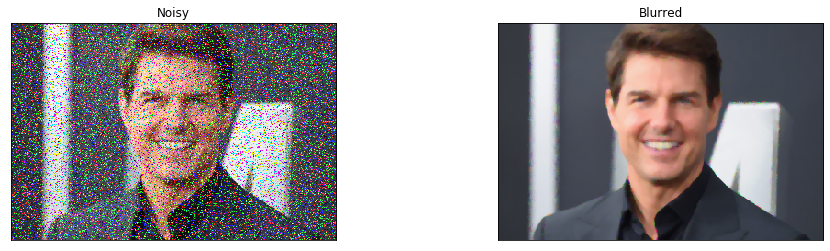

In [3]:
def salt_pepper_noise(img, p):
    print(img.shape)
    rnd = np.random.random(img.shape)
    noisy = img.copy()
    noisy[rnd < p] = 0
    noisy[rnd > 1 - p] = 255
    return noisy



%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
fn = './images/tom.jpg'
imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
imgs = salt_pepper_noise(imgo, 0.1)
imgm = cv.medianBlur(imgs, 5)
f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgs), ax1.title.set_text('Noisy')
ax2.imshow(imgm), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

# Creating a Grayscale Image

44


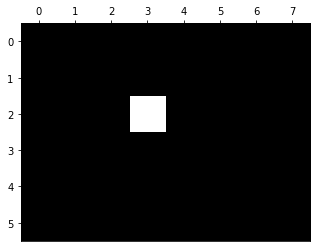

In [4]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = np.zeros((6,8),dtype=np.uint8)

im[2,3] = 300
print(im[2,3])
fig, ax = plt.subplots()
ax.imshow(im, cmap = 'gray')
ax.xaxis.tick_top()
plt.show()

# Creating a Color Image

[200  20 100]


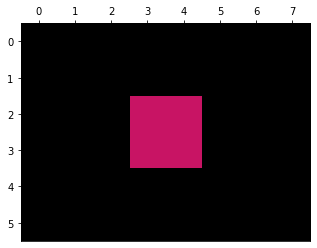

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = np.zeros((6,8, 3),dtype=np.uint8)

im[2:4,3:5] = [200, 20, 100]
print(im[2,3])
fig, ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

# Displaying with Matplotlib

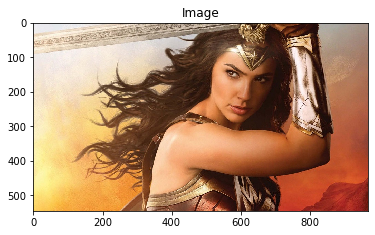

In [6]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Image')
plt.show()

# Displaying with OpencCV's HighGUI

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./images/katniss.jpg', cv.IMREAD_COLOR)
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

# Displaying Image Properties

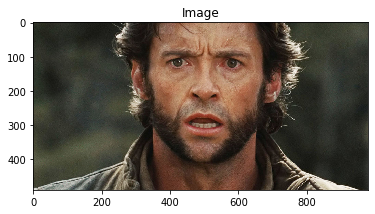

(490, 980, 3)
1440600
uint8


In [7]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./images/hugh.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Image')
plt.show()
print(img.shape)
print(img.size)
print(img.dtype)

# Increasing the Brightness

Text(0.5, 1.0, 'cv.add')

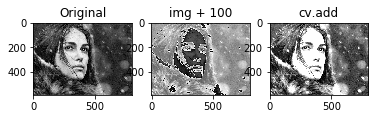

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./images/keira.jpg', cv.IMREAD_GRAYSCALE)
imgb = img + 100
imgc = cv.add(img, 100)
f, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(imgb, cmap="gray")
ax[1].set_title('img + 100')
ax[2].imshow(imgc, cmap="gray")
ax[2].set_title('cv.add')

# Brightness Increasing Using Loops
Do not use this, due to inefficiencies.
Instead, use OpenCV filters or Cython.

Text(0.5, 1.0, 'image_brighten')

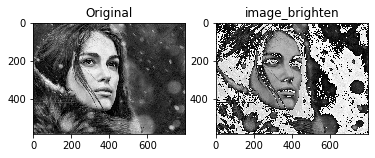

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def image_brighten(image, shift):
    h = image.shape[0]
    w = image.shape[1] 
    result = np.zeros(image.shape, image.dtype)
    for i in range(0,h):
        for j in range(0,w):
            result[i,j] = min(image[i,j] + shift, 255)
    return result

img = cv.imread('./images/keira.jpg', cv.IMREAD_GRAYSCALE)    
imgb = image_brighten(img, 200)
f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(imgb, cmap = 'gray')
ax[1].set_title('image_brighten')

# Zeroing-Out the Green and Blue Planes

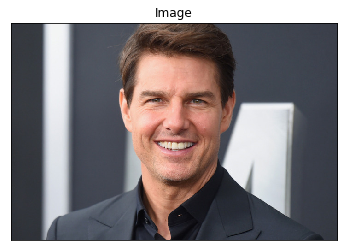

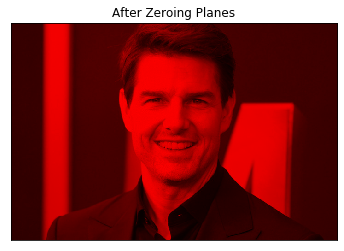

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread('./images/tom.jpg', cv.IMREAD_COLOR)
if img is None:
    print('Image could not be read.')
    assert False
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()
img[:,:,1:3] = 0
plt.imshow(img)
plt.title('After Zeroing Planes')
plt.xticks([]), plt.yticks([])
plt.show()